<a href="https://colab.research.google.com/github/ayushkumarjr/Credit-Card-Fraud-Detection/blob/main/AnomalyDetection_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Credit Card/creditcard.csv')

In [3]:
df=data.copy()

In [4]:
data.isnull().sum().max()

0

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print('No of fraud Class is {} which is {}%'.format(data['Class'].value_counts()[0],round(100*data['Class'].value_counts()[0]/len(df),2)))
print('No of fraud Class is {} which is {}%'.format(data['Class'].value_counts()[1],round(100*data['Class'].value_counts()[1]/len(df),2)))

No of fraud Class is 284315 which is 99.83%
No of fraud Class is 492 which is 0.17%


In [7]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

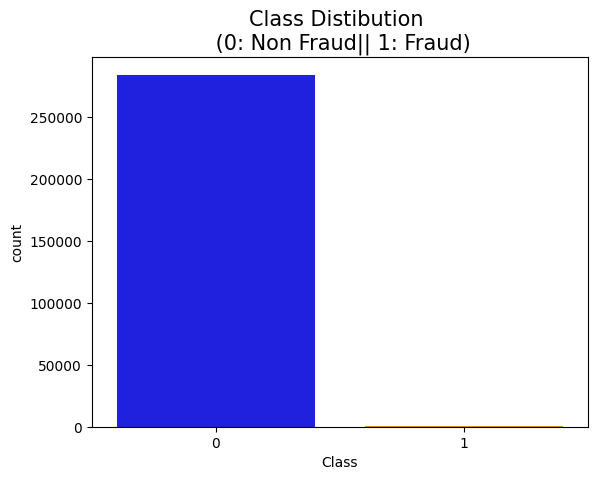

In [8]:
colors=['#0000FF','#FFA500']

sns.countplot(data=data,x='Class',palette=colors)
plt.title('Class Distibution \n (0: Non Fraud|| 1: Fraud)',fontsize=15)
plt.show()

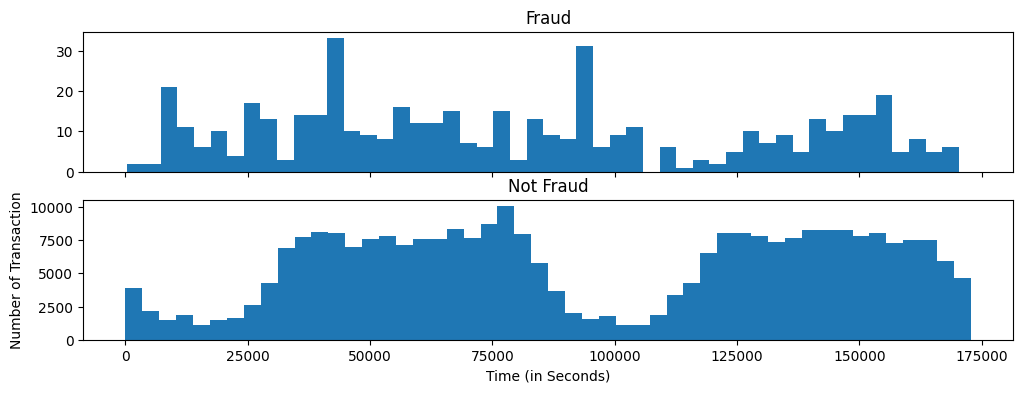

In [9]:
fig, (ax1,ax2)=plt.subplots(2,1, sharex=True, figsize=(12,4))

ax1.hist(df.Time[df.Class==1],bins=50)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class==0],bins=50)
ax2.set_title('Not Fraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transaction')
plt.show();

In [10]:
# Cylindrical Coding
seconds_in_day=24*60*60

df['sin_time']=np.sin(2*np.pi*df.Time/seconds_in_day)
df['cos_time']=np.cos(2*np.pi*df.Time/seconds_in_day)

df.drop('Time',axis=1,inplace=True)


In [11]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler=MinMaxScaler(feature_range=(0,1))
df['scaled_amount']=mm_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop('Amount',axis=1,inplace=True)


In [12]:
# seperating input and output class
X_orig=df.drop('Class',axis=1)
Y_orig=df['Class']
df=df.sample(frac=1)

#amount of fraud class 492 rows
fraud_df=df.loc[df['Class']==1]
non_fraud=df.loc[df['Class']==0][:492]

normal_distributed_df=pd.concat([fraud_df,non_fraud])

# shuffle the dataframe
new_df=normal_distributed_df.sample(frac=1,random_state=42)

X=new_df.drop('Class',axis=1)
Y=new_df['Class']

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import average_precision_score


# **First we model data as is and applying Clustering Algorithm**

In [14]:
from sklearn.cluster import KMeans

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import average_precision_score

In [15]:
from sklearn.metrics.cluster import adjusted_rand_score


In [16]:
# Modeling the data as is

kmeans=KMeans(n_clusters=2)
kmeans.fit(X_orig)
labels=kmeans.predict(X_orig)

kmeans_RI=adjusted_rand_score(Y_orig,labels)
print('Kmeans RI Score:',kmeans_RI)
f1=f1_score(Y_orig,labels)
print('f1 score:',f1)
precision=precision_score(Y_orig,labels)
print('Precision Score:',precision)
recall=recall_score(Y_orig,labels)
print('recall:',recall)
average_precision=average_precision_score(Y_orig,labels)
print('Average Precision -Recall Score:',average_precision)
accuracy=accuracy_score(Y_orig,labels)
print('Accuracy:',accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans RI Score: -0.0001480139167940794
f1 score: 0.004754284500102921
Precision Score: 0.0023849336149065013
recall: 0.7276422764227642
Average Precision -Recall Score: 0.0022058725785357967
Accuracy: 0.4737313338506427


In [17]:
# #Modeling the data as is AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

ag=AgglomerativeClustering(n_clusters=2,linkage='complete')
clustering=ag.fit_predict(X)
kmeans_RI=adjusted_rand_score(Y,clustering)
print('Kmeans RI Score:',kmeans_RI)
f1=f1_score(Y,clustering)
print('f1 score:',f1)
precision=precision_score(Y,clustering)
print('Precision Score:',precision)
recall=recall_score(Y,clustering)
print('recall:',recall)
average_precision=average_precision_score(Y,clustering)
print('Average Precision -Recall Score:',average_precision)
accuracy=accuracy_score(Y,clustering)
print('Accuracy:',accuracy)




Kmeans RI Score: 0.0003721959661186011
f1 score: 0.0398406374501992
Precision Score: 1.0
recall: 0.02032520325203252
Average Precision -Recall Score: 0.5101626016260163
Accuracy: 0.5101626016260162


# **Let's try the same clusterings with under sampling of over represented class(non-fraud) class**

In [18]:
fraud=df[df['Class']==0]
normal=df[df['Class']==1]

In [19]:
from imblearn.under_sampling import NearMiss

In [20]:
# Implementing
X=df.drop('Class',axis=1)
y=df.Class

In [21]:
nm=NearMiss()
X_res,y_res=nm.fit_resample(X,y)


In [22]:
# Modeling the data as is

kmeans=KMeans(n_clusters=2)
kmeans.fit(X_res)
labels=kmeans.predict(X_res)

kmeans_RI=adjusted_rand_score(y_res,labels)
print('Kmeans RI Score:',kmeans_RI)
f1=f1_score(y_res,labels)
print('f1 score:',f1)
precision=precision_score(y_res,labels)
print('Precision Score:',precision)
recall=recall_score(y_res,labels)
print('recall:',recall)
average_precision=average_precision_score(y_res,labels)
print('Average Precision -Recall Score:',average_precision)
accuracy=accuracy_score(y_res,labels)
print('Accuracy:',accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans RI Score: 0.10132302412484853
f1 score: 0.5057121096725057
Precision Score: 0.4043848964677223
recall: 0.6747967479674797
Average Precision -Recall Score: 0.43547923907984515
Accuracy: 0.3404471544715447


In [23]:
# #Modeling the data as is AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

ag=AgglomerativeClustering(n_clusters=2,linkage='complete')
clustering=ag.fit_predict(X_res)
kmeans_RI=adjusted_rand_score(y_res,clustering)
print('Kmeans RI Score:',kmeans_RI)
f1=f1_score(y_res,clustering)
print('f1 score:',f1)
precision=precision_score(y_res,clustering)
print('Precision Score:',precision)
recall=recall_score(y_res,clustering)
print('recall:',recall)
average_precision=average_precision_score(y_res,clustering)
print('Average Precision -Recall Score:',average_precision)
accuracy=accuracy_score(y_res,clustering)
print('Accuracy:',accuracy)

Kmeans RI Score: 0.0003721959661186011
f1 score: 0.0398406374501992
Precision Score: 1.0
recall: 0.02032520325203252
Average Precision -Recall Score: 0.5101626016260163
Accuracy: 0.5101626016260162


# **Let's Try OverSampling the under represented Class(Fraud)**

In [24]:
# For Kmeans
X=df.drop('Class',axis=1)
y=df.Class
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(sampling_strategy=0.5)
X_up,y_up=os.fit_resample(X,y)
# For AGNEST
new_df=X_up.join(y_up)
fraud_df=new_df.loc[new_df.Class==1][:900]
not_fraud_df=new_df.loc[new_df.Class==0][:900]

new_df_ag=pd.concat([fraud_df,not_fraud_df])



In [25]:
X_agnest=new_df_ag.drop('Class',axis=1)
y_agnest=new_df_ag.Class

In [26]:
# Modeling the upsampled data as kmeans

kmeans=KMeans(n_clusters=2)
kmeans.fit(X_up)
labels=kmeans.predict(X_up)

kmeans_RI=adjusted_rand_score(y_up,labels)
print('Kmeans RI score:',kmeans_RI)
f1 = f1_score(y_up, labels)
print("f1 score :", f1)
precision=precision_score(y_up,labels)
print('precision score:',precision)
recall=recall_score(y_up,labels)
print('recall score:',recall)
average_precision=average_precision_score(y_up,labels)
print('average precision score:',average_precision)
accuracy=accuracy_score(y_up,labels)
print('accuracy score:',accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans RI score: 0.25875233564465144
f1 score : 0.5000369209996097
precision score: 0.9992621793115078
recall score: 0.333448229774123
average precision score: 0.555385607199012
accuracy score: 0.7777345288788009


In [29]:
# Modeling the upsampled data as agnest

clustering = AgglomerativeClustering(n_clusters=2, linkage="complete").fit_predict(X_agnest)

kmeans_RI=adjusted_rand_score(y_agnest,clustering)
print('Kmeans RI score:',kmeans_RI)
f1 = f1_score(y_agnest, clustering)
print("f1 score :", f1)
precision=precision_score(y_agnest,clustering)
print('precision score:',precision)
recall=recall_score(y_agnest,clustering)
print('recall score:',recall)
average_precision=average_precision_score(y_agnest,clustering)
print('average precision score:',average_precision)
accuracy=accuracy_score(y_agnest,clustering)
print('accuracy score:',accuracy)


Kmeans RI score: 0.0003359961188165973
f1 score : 0.03707742639040349
precision score: 1.0
recall score: 0.01888888888888889
average precision score: 0.5094444444444445
accuracy score: 0.5094444444444445


# **Let's try with over-sampling the under represented class using SMOTE(Synthetic Minority Over-Sampled Technique Algorithm**

In [30]:
from imblearn.combine import SMOTETomek


In [31]:
from imblearn.over_sampling import SMOTE

# sepreate input features andd target
y=df.Class
X=df.drop('Class', axis=1)

sm=SMOTE(random_state=27)
X_smote, y_smote=sm.fit_resample(X,y)

X_agnest=X_smote[:500]
y_agnest=y_smote[:500]

In [32]:
 #Modeling the upsampled data using  kmeans and SMOTE

kmeans=KMeans(n_clusters=2)
kmeans.fit(X_smote)
labels=kmeans.predict(X_smote)

kmeans_RI=adjusted_rand_score(y_smote,labels)
print('Kmeans RI score:',kmeans_RI)
f1 = f1_score(y_smote, labels)
print("f1 score :", f1)
precision=precision_score(y_smote,labels)
print('precision score:',precision)
recall=recall_score(y_smote,labels)
print('recall score:',recall)
average_precision=average_precision_score(y_smote,labels)
print('average precision score:',average_precision)
accuracy=accuracy_score(y_smote,labels)
print('accuracy score:',accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans RI score: 0.10719973175190901
f1 score : 0.4934008000635813
precision score: 0.999645751704149
recall score: 0.3275310834813499
average precision score: 0.6636495144125135
accuracy score: 0.6637075075180697


In [33]:
# Modeling the upsampled data using agnest and SMOTE

clustering = AgglomerativeClustering(n_clusters=2, linkage="complete").fit_predict(X_agnest)

kmeans_RI=adjusted_rand_score(y_agnest,clustering)
print('Kmeans RI score:',kmeans_RI)
f1 = f1_score(y_agnest, clustering)
print("f1 score :", f1)
precision=precision_score(y_agnest,clustering)
print('precision score:',precision)
recall=recall_score(y_agnest,clustering)
print('recall score:',recall)
average_precision=average_precision_score(y_agnest,clustering)
print('average precision score:',average_precision)
accuracy=accuracy_score(y_agnest,clustering)
print('accuracy score:',accuracy)

Kmeans RI score: 0.0
f1 score : 0.0
precision score: 0.0
recall score: 0.0
average precision score: -0.0
accuracy score: 0.994


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
